# Import the necessary libraries

In [1]:
import pandas as pd

# Loading the dataset

In [2]:
# Loading the dataset
df = pd.read_csv('starbucks_satisfactory_survey.csv')

# View the first five rows
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [45]:
# Check the shape
df.shape

(122, 32)

# Data Cleaning

### 1. Format Column Names

In [3]:
# 1. Format Column Names
old_column_names = list(df.columns)
new_column_names = [
    'Timestamp', 'Gender', 'Age',
    'Status', 'Income',
    'Frequency',
    'Enjoyment',
    'Time Spent',
    'Outlet Proximity',
    'Membership',
    'Frequent Purchase',
    'Avg Spend',
    'Quality Rating',
    'Price Range Rating',
    'Sales Importance',
    'Ambiance Rating',
    'WiFi Rating',
    'Service Rating',
    'Meeting/Hangout Likelihood',
    'Promotion Channels',
    'Buying Intention'
]

In [4]:
df.columns = new_column_names

### 2. Data Types Check

In [5]:
# 2. Data Types Check
df.dtypes

Timestamp                     object
Gender                        object
Age                           object
Status                        object
Income                        object
Frequency                     object
Enjoyment                     object
Time Spent                    object
Outlet Proximity              object
Membership                    object
Frequent Purchase             object
Avg Spend                     object
Quality Rating                 int64
Price Range Rating             int64
Sales Importance               int64
Ambiance Rating                int64
WiFi Rating                    int64
Service Rating                 int64
Meeting/Hangout Likelihood     int64
Promotion Channels            object
Buying Intention              object
dtype: object

In [6]:
# Exploring Age
df['Age']

0      From 20 to 29
1      From 20 to 29
2      From 20 to 29
3      From 20 to 29
4      From 20 to 29
           ...      
117     40 and above
118    From 20 to 29
119    From 20 to 29
120    From 20 to 29
121    From 20 to 29
Name: Age, Length: 122, dtype: object

In [7]:
# Function to extract average age from the range
def calculate_avg_age(age_range):
    # Extract numerical values from the range
    values = [int(s) for s in age_range.split() if s.isdigit()]
    
    # Calculate average age
    if len(values) == 1:
        return values[0]  # For '40 and above' or single values
    elif len(values) == 2:
        return sum(values) / 2  # For ranges like 'From 20 to 29'
    else:
        return None

# Apply the function to create a new 'Calculated Age' column
df['Calculated Age'] = df['Age'].apply(calculate_avg_age)


In [8]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Status', 'Income', 'Frequency',
       'Enjoyment', 'Time Spent', 'Outlet Proximity', 'Membership',
       'Frequent Purchase', 'Avg Spend', 'Quality Rating',
       'Price Range Rating', 'Sales Importance', 'Ambiance Rating',
       'WiFi Rating', 'Service Rating', 'Meeting/Hangout Likelihood',
       'Promotion Channels', 'Buying Intention', 'Calculated Age'],
      dtype='object')

In [9]:
# Exploring Annual Income
df['Income']

0        Less than RM25,000
1        Less than RM25,000
2        Less than RM25,000
3        Less than RM25,000
4        Less than RM25,000
               ...         
117     RM25,000 - RM50,000
118      Less than RM25,000
119      Less than RM25,000
120      Less than RM25,000
121    RM50,000 - RM100,000
Name: Income, Length: 122, dtype: object

In [10]:
# Function to convert income ranges to numerical values
def convert_to_numeric(income_range):
    if income_range.startswith('Less than'):
        return int(income_range.split('RM')[-1].replace(',', ''))
    elif '-' in income_range:
        values = income_range.split(' - ')
        return (int(values[0].split('RM')[-1].replace(',', '')) + int(values[1].split('RM')[-1].replace(',', ''))) / 2
    else:
        return None  # Handle other cases if needed

# Apply the function to create a new 'Numerical Income' column
df['Numerical Income'] = df['Income'].apply(convert_to_numeric)

### 3. Convert Timestamp column to datetime type

In [11]:
# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_10368\1956301176.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


### 4. Handling Missing Values

In [12]:
# 3. Handling Missing Values
# Checking missing values in the entire dataset
missing_values_overall = df.isnull().sum()
missing_values_overall

Timestamp                     0
Gender                        0
Age                           0
Status                        0
Income                        0
Frequency                     0
Enjoyment                     1
Time Spent                    0
Outlet Proximity              0
Membership                    0
Frequent Purchase             0
Avg Spend                     0
Quality Rating                0
Price Range Rating            0
Sales Importance              0
Ambiance Rating               0
WiFi Rating                   0
Service Rating                0
Meeting/Hangout Likelihood    0
Promotion Channels            1
Buying Intention              0
Calculated Age                0
Numerical Income              6
dtype: int64

In [13]:
# Addressing Missing Values in Specific Columns
median_income = df['Numerical Income'].median()
df['Numerical Income'].fillna(median_income, inplace=True)

In [14]:
# Exploring 'Enjoyment' column
print(df['Enjoyment'].unique())

['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy' nan
 'I dont like coffee' 'Never' 'Never ']


In [15]:
# Standardizing entries for 'never'...

# Standardizing the 'Preferred Way to Enjoy Starbucks' column
df['Enjoyment'] = df['Enjoyment'].str.lower().str.strip()
df['Enjoyment'].replace({'never buy': 'never',
                         'never ': 'never',
                         'i dont like coffee': 'never'}, inplace=True)

In [16]:
# Confirm changes has been made to 'Enjoyment' column
print(df['Enjoyment'].unique())

['dine in' 'take away' 'drive-thru' 'never' nan]


In [17]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Status', 'Income', 'Frequency',
       'Enjoyment', 'Time Spent', 'Outlet Proximity', 'Membership',
       'Frequent Purchase', 'Avg Spend', 'Quality Rating',
       'Price Range Rating', 'Sales Importance', 'Ambiance Rating',
       'WiFi Rating', 'Service Rating', 'Meeting/Hangout Likelihood',
       'Promotion Channels', 'Buying Intention', 'Calculated Age',
       'Numerical Income'],
      dtype='object')

In [18]:
# Exploring 'Promotion Channels' column
print(df['Promotion Channels'].unique())

['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)'
 'Social Media;In Store displays' 'In Store displays;Billboards'
 'Through friends and word of mouth' 'Starbucks Website/Apps;Social Media'
 'Social Media'
 'Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth'
 'Starbucks Website/Apps;Social Media;Through friends and word of mouth'
 'Social Media;Through friends and word of mouth'
 'Social Media;Through friends and word of mouth;In Store displays'
 'Starbucks Website/Apps' 'Emails' 'Social Media;Emails'
 'Through friends and word of mouth;In Store displays'
 'Social Media;In Store displays;Billboards' 'Application offer'
 'Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays'
 'In Store displays'
 'Social Media;Through friends and word of mouth;Billboards'
 'Starbucks Website/Apps;Social Media;Emails;Billboards'
 'Social Media;Emails;Deal sites (fave, iprice, etc...);Through friends and word of mo

Deciding to handle missing values based on categorical nature...

### Final Comments

Decided to leave missing values in `Enjoyment` (i.e. Preferred Way to Enjoy Starbucks) and  `'Promotion Channels` (i.e. Promotion Awareness Channels) due to their categorical nature and limited impact.


### Save Cleaned Data

In [19]:
# Save cleaned Data
df.to_csv('starbucks_satisfactory_survey_cleaned.csv', index=False)

# Exploratory Data Analysis (EDA)

In [20]:
# Loading the cleaned Startbucks dataset
df = pd.read_csv('starbucks_satisfactory_survey_cleaned.csv')

In [21]:
df.head()

,Timestamp,Gender,Age,Status,Income,Frequency,Enjoyment,Time Spent,Outlet Proximity,Membership,...,Price Range Rating,Sales Importance,Ambiance Rating,WiFi Rating,Service Rating,Meeting/Hangout Likelihood,Promotion Channels,Buying Intention,Calculated Age,Numerical Income
0,2019-10-01 12:38:43-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,24.5,25000.0
1,2019-10-01 12:38:54-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,take away,Below 30 minutes,1km - 3km,Yes,...,3,4,4,4,5,2,Social Media;In Store displays,Yes,24.5,25000.0
2,2019-10-01 12:38:56-08:00,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,3,4,4,4,4,3,In Store displays;Billboards,Yes,24.5,25000.0
3,2019-10-01 12:39:08-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,take away,Below 30 minutes,more than 3km,No,...,1,4,3,3,3,3,Through friends and word of mouth,No,24.5,25000.0
4,2019-10-01 12:39:20-08:00,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,take away,Between 30 minutes to 1 hour,1km - 3km,No,...,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes,24.5,25000.0


### Descriptive Statistics
Let's begin by computing summary statistics for numerical columns to get a sense of the data distribution, measures of central tendency, and variability:

In [22]:
numerical_summary = df.describe()
print(numerical_summary)

       Quality Rating  Price Range Rating  Sales Importance  Ambiance Rating  \
count      122.000000          122.000000        122.000000       122.000000   
mean         3.663934            2.893443          3.795082         3.754098   
std          0.941343            1.081836          1.090443         0.929867   
min          1.000000            1.000000          1.000000         1.000000   
25%          3.000000            2.000000          3.000000         3.000000   
50%          4.000000            3.000000          4.000000         4.000000   
75%          4.000000            4.000000          5.000000         4.000000   
max          5.000000            5.000000          5.000000         5.000000   

       WiFi Rating  Service Rating  Meeting/Hangout Likelihood  \
count   122.000000      122.000000                  122.000000   
mean      3.254098        3.745902                    3.516393   
std       0.958317        0.828834                    1.030394   
min       1.000

### Visualization

Next, we can create visual representations to gain insights into the distribution and relationships between variables:

##### i. Customer Ratings

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

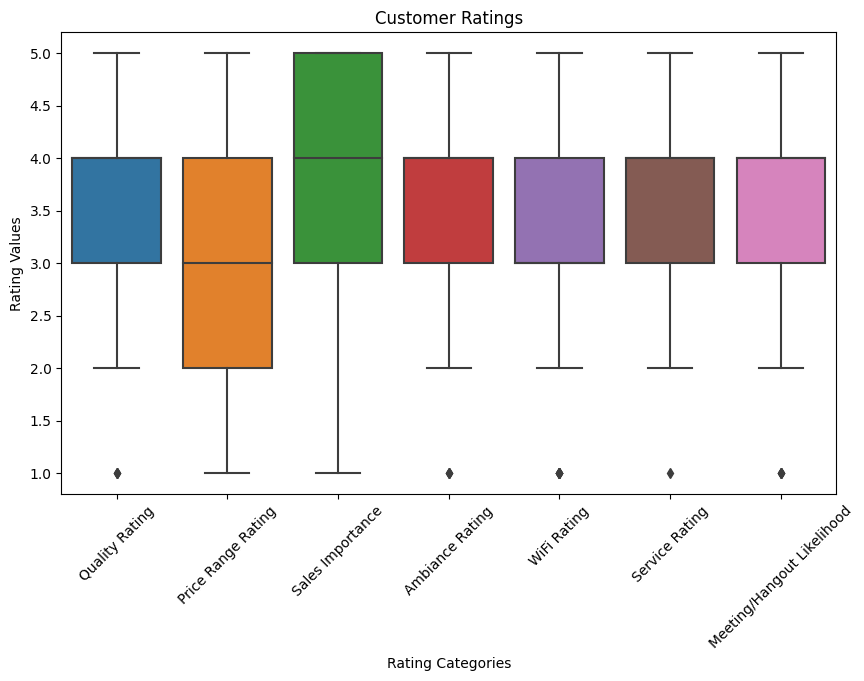

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Ratings
ratings_columns = ['Quality Rating', 'Price Range Rating', 'Sales Importance', 
                   'Ambiance Rating', 'WiFi Rating', 'Service Rating', 
                   'Meeting/Hangout Likelihood']

# Box plots for Customer Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[ratings_columns])
plt.title('Customer Ratings')
plt.xlabel('Rating Categories')
plt.ylabel('Rating Values')
plt.xticks(rotation=45)
plt.show()

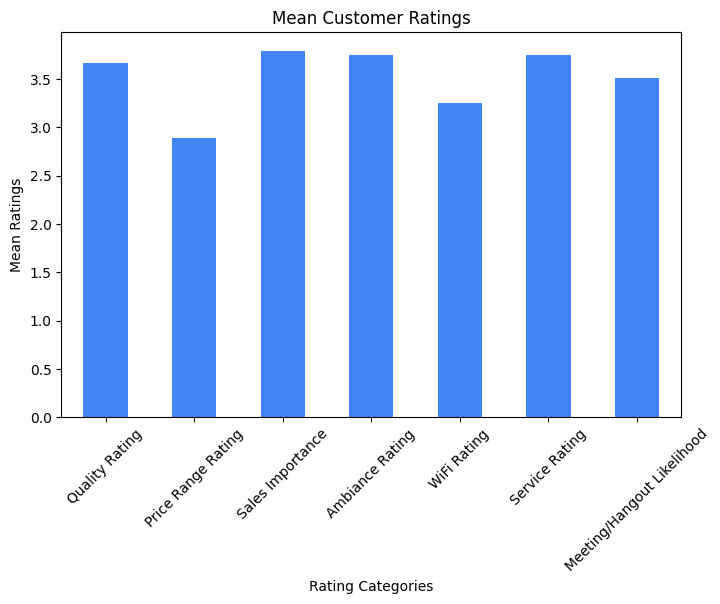

In [24]:
# Bar chart for mean ratings
mean_ratings = df[ratings_columns].mean()
plt.figure(figsize=(8, 5))
mean_ratings.plot(kind='bar', color='#4285F4')
plt.title('Mean Customer Ratings')
plt.xlabel('Rating Categories')
plt.ylabel('Mean Ratings')
plt.xticks(rotation=45)
plt.show()

##### ii. Age Distribution

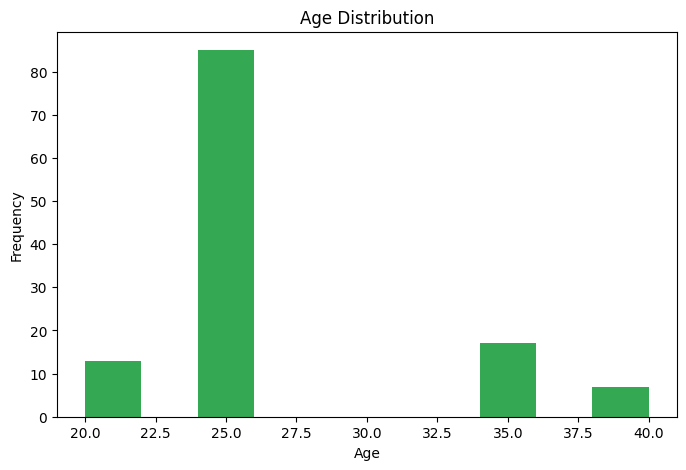

In [25]:
# Demographics: Age Distribution (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(df['Calculated Age'], bins=10, color='#34A853')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### iii. Income Distribution

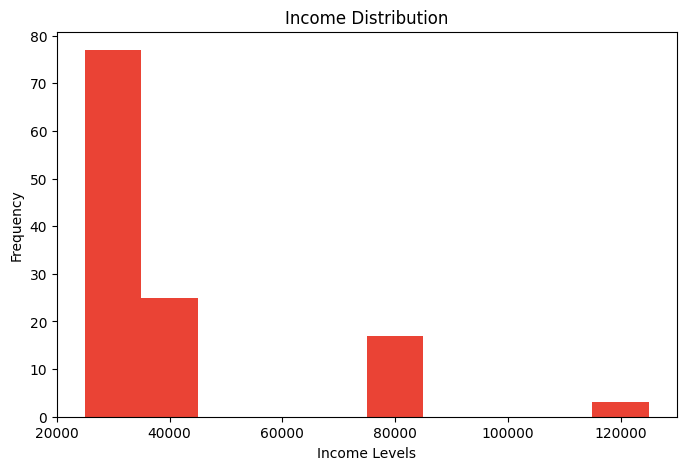

In [26]:
# Demographics: Income Distribution (Histogram)
plt.figure(figsize=(8, 5))
plt.hist(df['Numerical Income'], bins=10, color='#EA4335')
plt.title('Income Distribution')
plt.xlabel('Income Levels')
plt.ylabel('Frequency')
plt.show()

#### Descriptive Statistics Summary:

Customer Ratings:
* Quality Rating, Price Range Rating, Sales Importance, Ambiance Rating, WiFi Rating, Service Rating, Meeting/Hangout Likelihood:
    * Ratings across these categories range from 1 to 5.
    * Generally positive ratings observed, with means close to 4.
    * Moderate variability around the mean indicated by standard deviations.
    * Uniform distribution within quartiles, reflecting consistent responses.

Demographics:
* Calculated Age:

    * Average age of respondents is approximately 26 years. 
    * Majority of respondents seem to be within a narrow age range, with quartiles around 24.5 to 26 years.


* Numerical Income:

    * Respondents' incomes mostly fall within the range of 25,000 to 37,500.
    * Considerable variability in income levels, evident from the high standard deviation compared to the mean.

##### iv. Categorical Variable Distribution

Exploring categorical variables like Gender, Status, and Frequency to understand their relationships

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

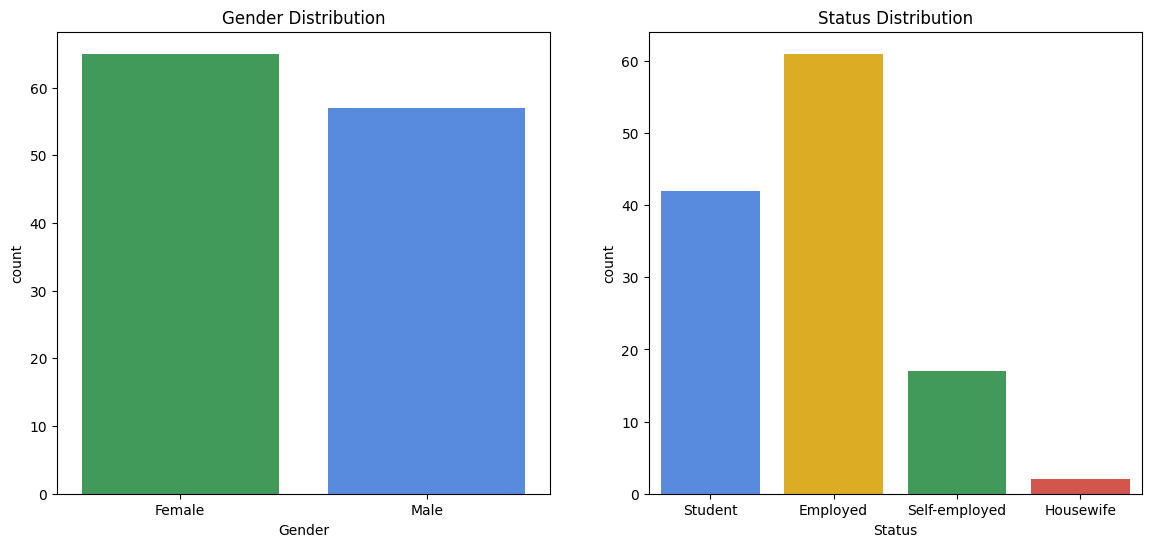

In [27]:
# Bar plots
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df, palette=['#34A853', '#4285F4'])
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='Status', data=df, palette=['#4285F4', '#FBBC05', '#34A853', '#EA4335'])
plt.title('Status Distribution')

#plt.xticks(rotation=45)
plt.show()

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


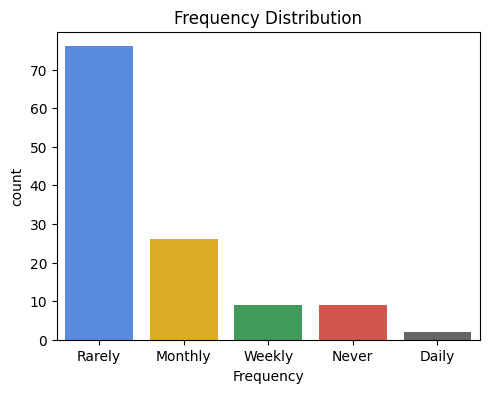

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Frequency', data=df, palette=['#4285F4', '#FBBC05', '#34A853', '#EA4335', '#666666'])
plt.title('Frequency Distribution')
plt.show()

#### Insights from Categorical Variable Distribution

Gender Distribution
* In terms of gender distribution, the analysis shows that there is a higher representation of female respondents among Starbucks patrons in this dataset.

Status Distribution
* Regarding status distribution, the analysis indicates that employed individuals constitute the most frequent patrons, followed by students, self-employed individuals, and housewives, in descending order.

Frequency Distribution
* The frequency distribution (i.e. Frequency of Starbucks Visits) reveals that the majority of respondents visit Starbucks "Rarely," followed by "Monthly." "Weekly" and "Never" categories display a similar occurrence rate, while "Daily" visits represent a smaller proportion within the dataset.

#### Correlation Analysis
We can explore correlations among numerical variables using a heatmap:

In [29]:
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()

In [30]:
correlation_matrix

,Quality Rating,Price Range Rating,Sales Importance,Ambiance Rating,WiFi Rating,Service Rating,Meeting/Hangout Likelihood,Calculated Age,Numerical Income
Quality Rating,1.000000,0.532617,0.222201,0.575164,0.287830,0.451050,0.418969,0.007514,-0.028261
Price Range Rating,0.532617,1.000000,0.170491,0.392726,0.289394,0.365881,0.420468,0.089855,0.006352
Sales Importance,0.222201,0.170491,1.000000,0.398178,0.327042,0.389976,0.197933,0.014748,0.068613
Ambiance Rating,0.575164,0.392726,0.398178,1.000000,0.488045,0.604545,0.349267,0.015607,-0.006192
WiFi Rating,0.287830,0.289394,0.327042,0.488045,1.000000,0.581395,0.259387,-0.063918,-0.194160
Service Rating,0.451050,0.365881,0.389976,0.604545,0.581395,1.000000,0.425870,0.108544,0.015423
Meeting/Hangout Likelihood,0.418969,0.420468,0.197933,0.349267,0.259387,0.425870,1.000000,0.139157,0.089004
Calculated Age,0.007514,0.089855,0.014748,0.015607,-0.063918,0.108544,0.139157,1.000000,0.397731
Numerical Income,-0.028261,0.006352,0.068613,-0.006192,-0.194160,0.015423,0.089004,0.397731,1.000000


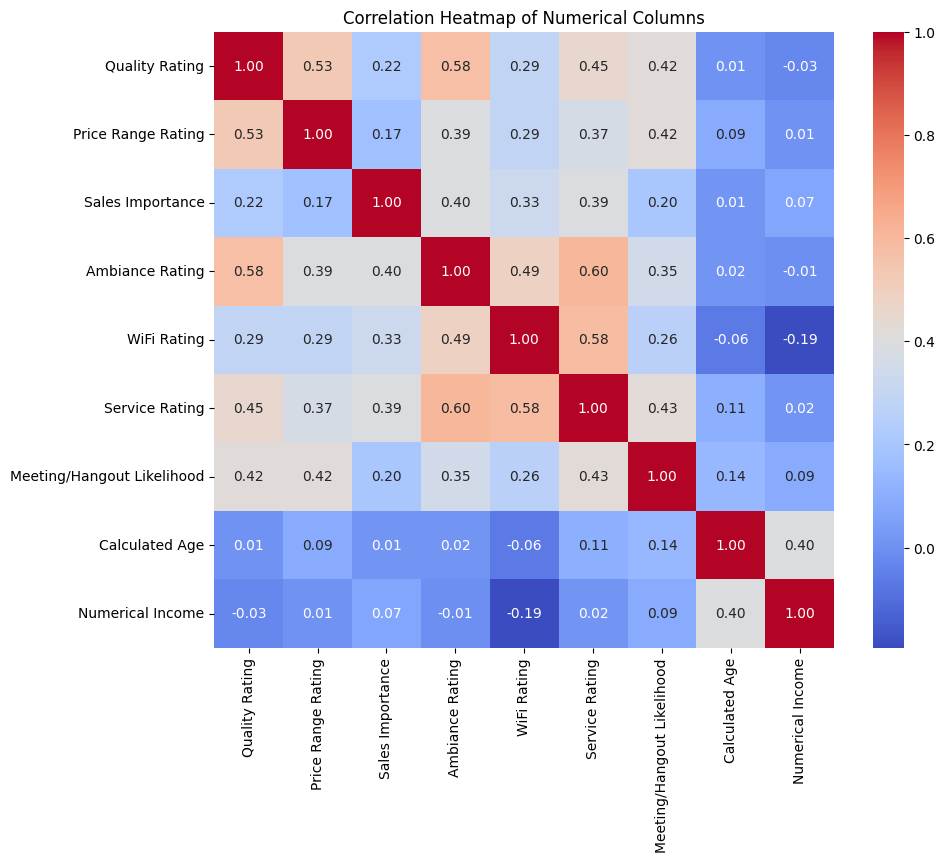

In [31]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

### Interpretation of Correlation Matrix

The correlation matrix provides insights into the relationships between various attributes in the Starbucks survey data:

- **Quality Rating:** Strong positive correlations with Ambiance Rating, Service Rating, indicating that those who rate quality higher also rate ambiance and service positively.

- **Price Range Rating:** Positively correlated with Quality Rating but with a weaker strength. Additionally, it shows a slight positive correlation with Calculated Age and Numerical Income, suggesting that those who rate price range higher might be slightly younger and have slightly lower income.

- **Sales Importance:** Shows a mild positive correlation with Ambiance and Service Ratings, hinting that sales importance might be somewhat related to how customers perceive ambiance and service.

- **WiFi Rating:** Doesn't exhibit strong correlations with other attributes, implying that WiFi quality doesn't strongly influence how customers rate other aspects.

- **Meeting/Hangout Likelihood:** Mild positive correlations with Quality Rating, Price Range Rating, and Service Rating. This suggests that customers who are likely to choose Starbucks for meetings or hangouts also rate these aspects positively.

- **Calculated Age and Numerical Income:** Very weak correlations with other attributes, indicating that these demographic factors might not significantly affect how customers rate Starbucks.

This analysis helps us understand the interconnections between different aspects of customer ratings, providing valuable insights into what influences customers' opinions about Starbucks.


#### Income Distribution Analysis

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

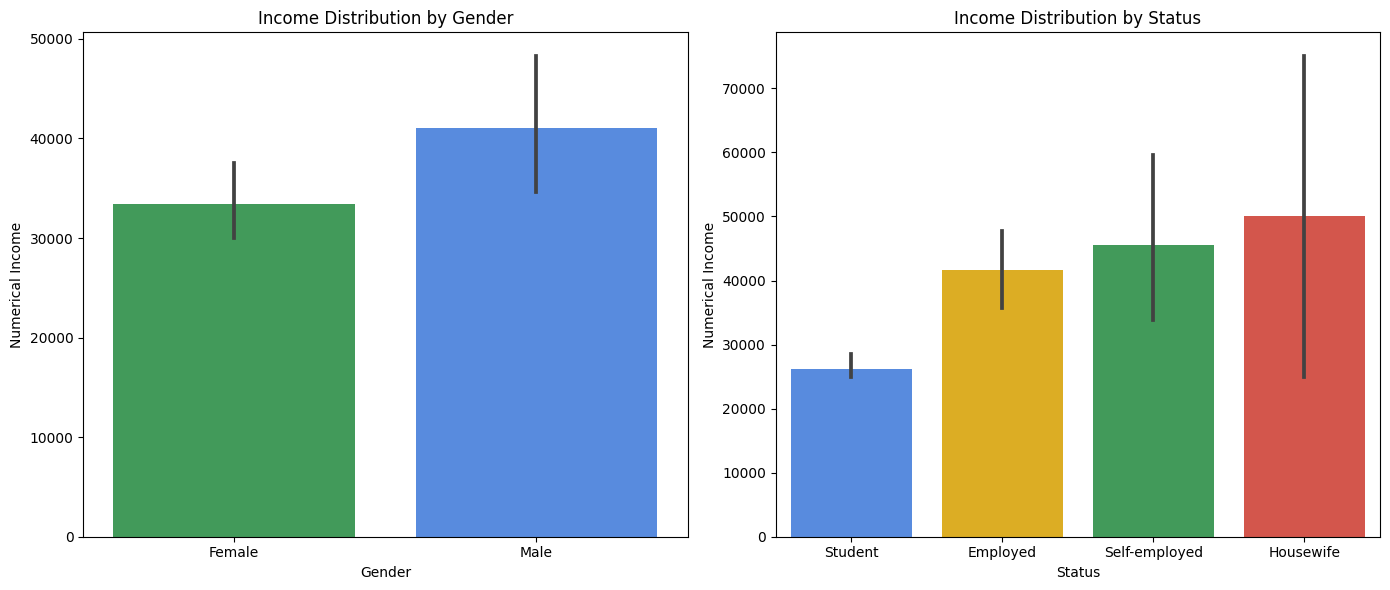

In [32]:
# Categorical plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='Numerical Income', data=df, palette=['#34A853', '#4285F4'])
plt.title('Income Distribution by Gender')

plt.subplot(1, 2, 2)
sns.barplot(x='Status', y='Numerical Income', data=df, palette=['#4285F4', '#FBBC05', '#34A853', '#EA4335', '#666666'])
plt.title('Income Distribution by Status')

plt.tight_layout()
plt.show()


The bar plots illustrate the average income distribution concerning gender and status:

- **Gender Distribution:** The plot demonstrates that, on average, males tend to have slightly higher incomes compared to females based on the survey data.

- **Status Distribution:** The income distribution varies across different statuses:
  - **Housewives:** They tend to have the highest average income among the surveyed categories.
  - **Self-Employed:** Followed by self-employed individuals, who generally show a higher average income than employed individuals.
  - **Employed:** The employed category depicts a slightly higher average income compared to students in the dataset.

While these findings suggest average income disparities across genders and statuses, it's important to note that these results reflect the surveyed population and might not necessarily represent the entire demographic landscape.


# Feature Engineering

#### Timestamp

Extract Date Components: Break down the timestamp into year, month, day, hour.

In [33]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [35]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['hour'] = df['Timestamp'].dt.hour

#### Age

Create Age Groups: Categorize ages into groups.

In [36]:
df['Calculated Age']

0      24.5
1      24.5
2      24.5
3      24.5
4      24.5
       ... 
117    40.0
118    24.5
119    24.5
120    24.5
121    24.5
Name: Calculated Age, Length: 122, dtype: float64

In [37]:
# Define age groups
bins = [0, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['Age Group'] = pd.cut(df['Calculated Age'], bins=bins, labels=labels)


#### Income
Create Income Brackets: Group income into brackets.

In [38]:
# Define income brackets
income_bins = [0, 25000, 50000, 75000, 100000]
income_labels = ['0-25K', '25-50K', '50-75K', '75-100K+']
df['Income Bracket'] = pd.cut(df['Numerical Income'], bins=income_bins, labels=income_labels)


#### Frequency
Convert Frequency to Numerical Representation: Map categories to numerical values.

In [39]:
frequency_mapping = {'Rarely': 1, 'Monthly': 2, 'Weekly': 3, 'Never': 4, 'Daily': 5}
df['Frequency Numeric'] = df['Frequency'].map(frequency_mapping)

#### Ratings
Aggregate Ratings: Compute an average or sum of ratings.

In [40]:
df['Avg Rating'] = df[['Quality Rating', 'Price Range Rating', 'Ambiance Rating']].mean(axis=1)

#### Promotion Channels
Count Channels: Calculate the number of promotion channels used.

In [41]:
df['Num Promotion Channels'] = df['Promotion Channels'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

#### Buying Intention
Convert Categorical to Numerical: Assign numerical values to categorical options.

In [42]:
buying_intention_mapping = {'Yes': 1, 'No': 0}
df['Buying Intention Numeric'] = df['Buying Intention'].map(buying_intention_mapping)

In [43]:
# Feature Engineered Table
df.head()

,Timestamp,Gender,Age,Status,Income,Frequency,Enjoyment,Time Spent,Outlet Proximity,Membership,...,Numerical Income,Year,Month,hour,Age Group,Income Bracket,Frequency Numeric,Avg Rating,Num Promotion Channels,Buying Intention Numeric
0,2019-10-01 12:38:43-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,25000.0,2019,10,12,Young,0-25K,1,4.000000,4,1
1,2019-10-01 12:38:54-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,take away,Below 30 minutes,1km - 3km,Yes,...,25000.0,2019,10,12,Young,0-25K,1,3.666667,2,1
2,2019-10-01 12:38:56-08:00,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,25000.0,2019,10,12,Young,0-25K,2,3.666667,2,1
3,2019-10-01 12:39:08-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,take away,Below 30 minutes,more than 3km,No,...,25000.0,2019,10,12,Young,0-25K,1,2.000000,1,0
4,2019-10-01 12:39:20-08:00,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,take away,Between 30 minutes to 1 hour,1km - 3km,No,...,25000.0,2019,10,12,Young,0-25K,2,2.666667,2,1


In [44]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Status', 'Income', 'Frequency',
       'Enjoyment', 'Time Spent', 'Outlet Proximity', 'Membership',
       'Frequent Purchase', 'Avg Spend', 'Quality Rating',
       'Price Range Rating', 'Sales Importance', 'Ambiance Rating',
       'WiFi Rating', 'Service Rating', 'Meeting/Hangout Likelihood',
       'Promotion Channels', 'Buying Intention', 'Calculated Age',
       'Numerical Income', 'Year', 'Month', 'hour', 'Age Group',
       'Income Bracket', 'Frequency Numeric', 'Avg Rating',
       'Num Promotion Channels', 'Buying Intention Numeric'],
      dtype='object')

# In-depth Analysis

### **Identifying Loyal Customers:**

#### Analyzing User Retention and High-Frequency Traits at Starbucks

In [54]:
# Identifying loyal customers (e.g., based on high visit frequency)
high_frequency_users = df[df['Frequency Numeric'] > df['Frequency Numeric'].quantile(0.75)]

# Analyzing traits of high-frequency users
high_frequency_traits = high_frequency_users[['Gender', 'Age Group', 'Income Bracket', 'Avg Rating', 'Num Promotion Channels']]

# Describe and analyze high-frequency traits
high_frequency_traits.describe(include='all')

,Gender,Age Group,Income Bracket,Avg Rating,Num Promotion Channels
count,20,20,20,20.000000,20.000000
unique,2,2,3,NaN,NaN
top,Female,Young,0-25K,NaN,NaN
freq,10,16,10,NaN,NaN
mean,NaN,NaN,NaN,3.333333,1.600000
std,NaN,NaN,NaN,0.991189,1.095445
min,NaN,NaN,NaN,1.000000,0.000000
25%,NaN,NaN,NaN,3.000000,1.000000
50%,NaN,NaN,NaN,3.333333,1.000000
75%,NaN,NaN,NaN,4.000000,2.000000


<Figure size 1000x600 with 0 Axes>

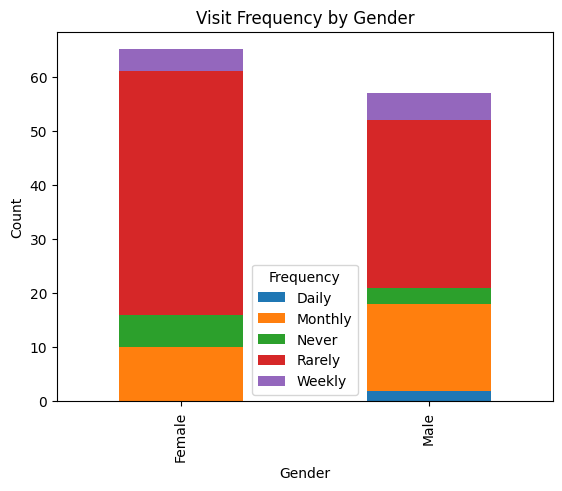

In [52]:
# Analyzing user retention based on frequency of visits
visit_frequency = df.groupby('Gender')['Frequency'].value_counts().unstack().fillna(0)


# Plotting visit frequency by gender
plt.figure(figsize=(10, 6))
visit_frequency.plot(kind='bar', stacked=True)
plt.title('Visit Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Frequency')
plt.show()

#### Insights from analyzing user retention based on frequency of visits

It seems like there's a noticeable difference in visit frequency between genders, particularly in daily and monthly visits. Males have a few instances of daily visits (although less frequent, less than 5 times), while females do not visit daily at all. However, in monthly visits, males have a higher count (almost 20 instances) compared to females (about 10 counts). Additionally, the weekly visit counts are relatively similar between males and females. Conversely, females tend to rarely or never visit Starbucks compared to males.

#### 2. Engagement Time Analysis
We'll start by examining the distribution of time spent by customers at Starbucks:

count                  122
unique                   5
top       Below 30 minutes
freq                    73
Name: Time Spent, dtype: object


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


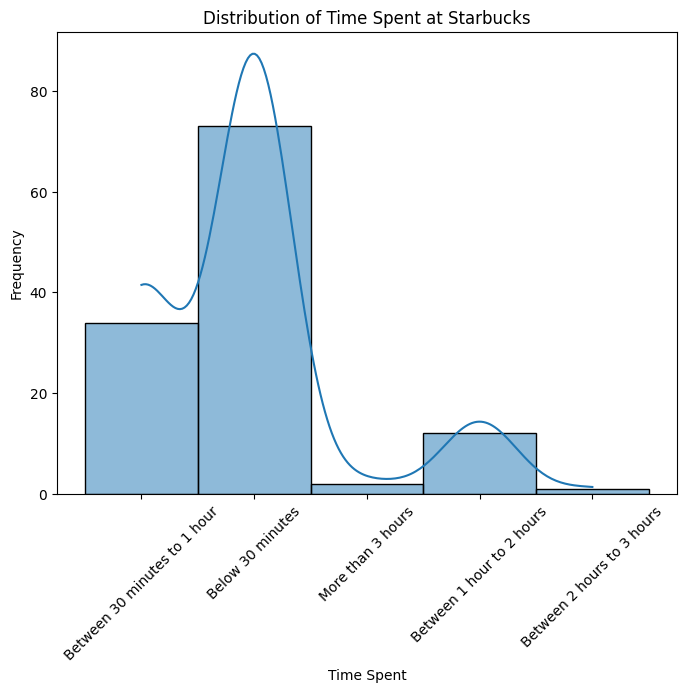

In [56]:
# Describing the distribution of time spent
time_spent_description = df['Time Spent'].describe()
print(time_spent_description)

# Visualizing time spent distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time Spent at Starbucks')
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

##### Insights for Engagement Time Analysis:

The analysis of customer engagement time at Starbucks revealed the following:

- **Most Frequent Engagements:** The majority of customers spend less than 30 minutes or between 30 minutes to 1 hour during their visits. These durations represent the most common engagement times observed in the dataset.

- **Moderate Engagement Durations:** There is a notable proportion of customers spending between 1 to 2 hours during their visits, indicating a less frequent but still significant duration for some customers.

- **Less Common Engagements:** Engagement times exceeding 2 hours are relatively uncommon. Instances of customers spending over 3 hours at Starbucks are notably scarce.

This analysis underscores the prevalence of relatively shorter visit durations among customers, emphasizing the importance for Starbucks to tailor its services and offerings to accommodate varying visit lengths and ensure optimal customer experiences across different engagement durations.

In [58]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Status', 'Income', 'Frequency',
       'Enjoyment', 'Time Spent', 'Outlet Proximity', 'Membership',
       'Frequent Purchase', 'Avg Spend', 'Quality Rating',
       'Price Range Rating', 'Sales Importance', 'Ambiance Rating',
       'WiFi Rating', 'Service Rating', 'Meeting/Hangout Likelihood',
       'Promotion Channels', 'Buying Intention', 'Calculated Age',
       'Numerical Income', 'Year', 'Month', 'hour', 'Age Group',
       'Income Bracket', 'Frequency Numeric', 'Avg Rating',
       'Num Promotion Channels', 'Buying Intention Numeric'],
      dtype='object')

##### 3. Total Purchases Analysis
For the total purchases analysis, let's explore the distribution of average spending:

count       119
unique        3
top       0-25K
freq         77
Name: Income Bracket, dtype: object


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


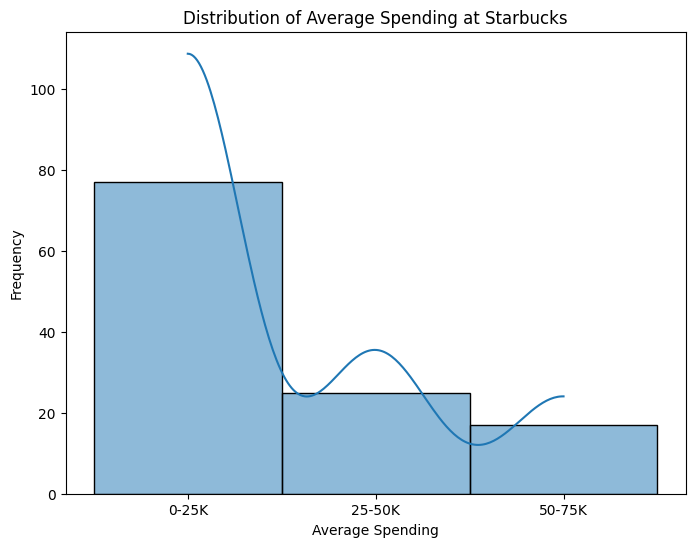

In [60]:
# Describing the distribution of average spending
avg_spend_description = df['Income Bracket'].describe()
print(avg_spend_description)

# Visualizing average spending distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Income Bracket'], bins=20, kde=True)
plt.title('Distribution of Average Spending at Starbucks')
plt.xlabel('Average Spending')
plt.ylabel('Frequency')
plt.show()

The insight derived from the 'Income Bracket' analysis indicates that a significant portion of Starbucks customers falls within the '0-25K' income range, comprising the majority of the dataset. This insight suggests that a substantial proportion of Starbucks patrons may belong to the lower-income segment. Understanding the spending behavior and preferences of customers within this income bracket can aid Starbucks in tailoring its offerings, pricing strategies, and loyalty programs to cater to this demographic, potentially enhancing customer satisfaction and retention within this income segment.

##### 4. Consistent Rating

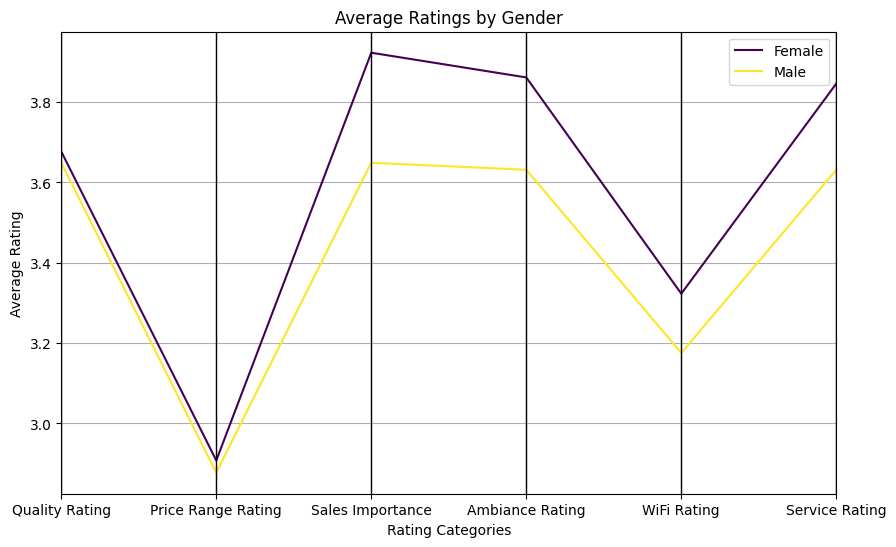

In [63]:
from pandas.plotting import parallel_coordinates

# Grouping by gender and calculating mean ratings
grouped_gender = df[ratings_columns + ['Gender']].groupby('Gender').mean().reset_index()

plt.figure(figsize=(10, 6))
parallel_coordinates(grouped_gender, 'Gender', colormap='viridis')
plt.title('Average Ratings by Gender')
plt.xlabel('Rating Categories')
plt.ylabel('Average Rating')
plt.legend(loc='upper right')
plt.show()


Upon analyzing the rating trends between genders, it was evident that female customers exhibited a higher level of rating consistency compared to their male counterparts. This means that females tend to provide more stable and uniform scores across different aspects such as Quality, Price Range, Sales Importance, Ambiance, etc., within the Starbucks experience. This consistency in ratings might indicate a more defined and consistent viewpoint or experience among female customers regarding these attributes at Starbucks.

# Modeling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  # For regression models

In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

In [50]:
import tensorflow as tf

##### Splitting Data into Training and Testing Sets

In [45]:
# Define features and target
X = df[['Calculated Age', 'Numerical Income', 'Year', 'Month', 'Frequency Numeric', 'Avg Rating', 'Num Promotion Channels', 'Buying Intention Numeric']] # input features
y = df['Buying Intention Numeric']  # target variable

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Feature Scaling

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

##### Model Training

In [48]:
# Instantiate your model (e.g., Linear Regression)
model = LinearRegression()  # Example - choose an appropriate model

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearRegression()

Model Evaluation

In [49]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.2375255450654622e-31
R-squared: 1.0


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

#### Using Tensorflow

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/500
3/3 [==============================] - 1s 116ms/step - loss: 88422896.0000 - mae: 8176.2046 - val_loss: 90516072.0000 - val_mae: 7911.7705
Epoch 2/500
3/3 [==============================] - 0s 23ms/step - loss: 51704600.0000 - mae: 6179.7979 - val_loss: 46324928.0000 - val_mae: 5628.2393
Epoch 3/500
3/3 [==============================] - 0s 22ms/step - loss: 25078442.0000 - mae: 4262.2920 - val_loss: 18332492.0000 - val_mae: 3493.9641
Epoch 4/500
3/3 [==============================] - 0s 24ms/step - loss: 8861523.0000 - mae: 2480.8872 - val_loss: 4046752.7500 - val_mae: 1581.9044
Epoch 5/500
3/3 [==============================] - 0s 23ms/step - loss: 1404180.3750 - mae: 921.7477 - val_loss: 47804.6602 - val_mae: 161.1924
Epoch 6/500
3/3 [==============================] - 0s 30ms/step - loss: 139674.2812 - mae: 314.7945 - val_loss: 1340455.3750 - val_mae: 1048.1740
Epoch 7/500
3/3 [==============================] - 0s 38ms/step - loss: 1372450.1250 - mae: 1079.1090 - val_los

In [54]:
mse_t, mae_t = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error: {mse_t}")
print(f"Mean Absolute Error: {mae_t}")


Mean Squared Error: 0.4144001007080078
Mean Absolute Error: 0.5580310821533203


In [61]:
df.head()

,Gender,Age,Status,Income,Frequency,Enjoyment,Time Spent,Outlet Proximity,Membership,Frequent Purchase,...,Calculated Age,Numerical Income,Year,Month,Age Group,Income Bracket,Frequency Numeric,Avg Rating,Num Promotion Channels,Buying Intention Numeric
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-10-01 12:38:43-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,24.5,25000.0,2019,10,Young,0-25K,1,4.000000,4,1
2019-10-01 12:38:54-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,24.5,25000.0,2019,10,Young,0-25K,1,3.666667,2,1
2019-10-01 12:38:56-08:00,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,24.5,25000.0,2019,10,Young,0-25K,2,3.666667,2,1
2019-10-01 12:39:08-08:00,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,take away,Below 30 minutes,more than 3km,No,Coffee,...,24.5,25000.0,2019,10,Young,0-25K,1,2.000000,1,0
2019-10-01 12:39:20-08:00,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,24.5,25000.0,2019,10,Young,0-25K,2,2.666667,2,1
